## **Predicting Bike Sharing Demand with Regression Models** 
---
By Aditya Nugraha

<!-- ![image: https://www.freepik.com/vectors/ride-bicycle](assets/5243.jpg) -->
<img src="assets/5243.jpg" alt="image: https://www.freepik.com/vectors/ride-bicycle"/>

*Image Source: https://www.freepik.com/vectors/ride-bicycle*

### **Contents**
---

1. Business Problem Understanding
2. Data Understanding
3. EDA & Feature Engineering
4. Modeling
5. Conclusion
6. Recommendation
7. Save Model

### **Business Problem Understanding**
---

**Context**

Sistem penyewaan sepeda adalah sarana penyewaan sepeda dimana proses mendapatkan keanggotaan, sewa, dan pengembalian sepeda secara mandiri melalui jaringan lokasi seperti kios di seluruh kota. Dengan menggunakan sistem ini, orang dapat menyewa sepeda dari satu lokasi dan mengembalikannya ke lokasi lain sesuai kebutuhan. Menurut data yang di rilis pada situs [Statista.com](https://www.statista.com/chart/14542/bike-sharing-programs-worldwide/) Hingga pertengahan tahun 2018, ada sekitar 1600 program penyewaan sepeda dengan 18,2 juta sepeda di lebih dari 1000 kota.

<img src="assets/14542.jpeg" alt="image: https://www.statista.com/chart/14542/bike-sharing-programs-worldwide/" width="600"/>

*Image Source: https://www.statista.com/chart/14542/bike-sharing-programs-worldwide/*

**Problem Statement**

Terlepas dari efek positifnya pada lalu lintas, masalah lingkungan dan kesehatan, sistem penyewaan sepeda sangat menarik karena data yang mereka hasilkan dapat digunakan untuk tujuan penelitian. Waktu keberangkatan dan kedatangan, lokasi dan durasi penggunaan dicatat dalam sistem ini. Data tersebut dapat digunakan untuk memprediksi kapan waktu, kondisi, dan tempat yang tepat bagi masyarakat untuk melakukan penyewaan sepeda, sekaligus menjadi masalah tersendiri bagi penyedia sistem penyewaan sepeda ini untuk **mengetahui seberapa banyak sepeda yang harus di distribusikan agar sepeda mereka dapat digunakan secara efisien sehingga mengurangi kemungkinan adanya kondisi yang mempunyai banyak sepeda namun sedikit yang menggunakannya ataupun sebaliknya.**

**Goals**

Berdasarkan permasalahan yang telah dijelaskan sebelumnya, pihak yang mengadakan program penyewaan sepeda perlu memiliki 'tool' yang dapat digunakan untuk **memprediksi seberapa banyak sepeda yang harus di distribusikan berdasarkan kondisi tertentu**. adanya perbedaan kondisi dan waktu dapat menambah keakuratan dalam memprediksi banyaknya sepeda yang digunakan, yang mana dapat mendistribusikan sepeda secara efisien sehingga penyedia dapat memaksimalkan keuntungan dari penyewaan tersebut.

**Analytics Approach**

Jadi, yang perlu dilakukan adalah menganalisis data untuk menemukan pola dari fitur-fitur yang ada, yang membedakan pada kondisi dan waktu tertentu.

Selanjutnya, kita akan membangun suatu model untuk memprediksi suatu nilai numerik atau biasa disebut dengan model regresi, model ini dapat digunakan sebagai 'tool' yang membantu penyedia sistem penyewaan sepeda ini untuk memprediksi banyaknya penyewa berdasarkan kondisi dan waktu tertentu.

**Metrics Evaluation**

Evaluasi metrik yang kita gunakan yang paling difokuskan adalah RMSE dan RMSLE, namun kita juga akan menggunakan MAE dan MAPE sebagai pembanding pada kasus ini.
* RMSE merupakan nilai rataan akar kuadrat dari error, metrik ini dapat digunakan untuk mengukur seberapa jauh nilai prediksi yang dihasilkan berdasarkan rataannya.
* RMSLE adalah nilai rataan akar kuadrat dari error yang digunakan khusus jika fitur target ditransformasikan menggunakan perhitungan logaritma, kita dapat mengunakan metrik ini untuk menghitung rasio antara nilai aktual dan prediksinya. nilai dari metrik ini dapat mereduksi error yang ditimbulkan oleh outliers atau perbedaan nilai yang terlalu jauh.
* MAE adalah rataan nilai absolut dari error
* MAPE adalah rataan persentase error yang dihasilkan oleh model regresi, dengan nilai keakuratan berdasarkan buku dari [Lewis's (1982)](https://www.nrpa.org/globalassets/journals/jlr/2003/volume-35/jlr-volume-35-number-4-pp-441-454.pdf) mengatakan bahwa jika nilai MAPE sebesar 0.10 atau 10% merupakan prediksi yang sangat akurat, 11-20% merupakan prediksi yang baik, 21-50% merupakan prediksi yang masuk akal, dan 51% dan lebih banyak lagi adalah prediksi yang tidak akurat, adapun jika lebih dari 100% merupakan prediksi yang sangat tidak akurat.

Semakin kecil nilai RMSLE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi banyaknya penyewa sepeda dengan limitasi fitur yang digunakan. 

### **Importing Libraries**
---

In [1]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error ,mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


C:\Users\indon\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


**Library Version Used**

In [2]:
import sklearn
import lightgbm
import xgboost
import matplotlib
from platform import python_version

lib = {'scikit-learn': sklearn, 'category_encoder': ce, 'xgboost': xgboost,
       'lightgbm': lightgbm, 'pandas': pd, 'numpy': np, 'seaborn': sns,
       'matplotlib': matplotlib}

for i in lib:
    print(lib[i].__version__, i)
else:
    print(pickle.format_version, 'pickle')
    print(python_version(), 'python')


1.0.2 scikit-learn
2.4.1 category_encoder
1.5.1 xgboost
3.3.2 lightgbm
1.4.2 pandas
1.21.5 numpy
0.11.2 seaborn
3.5.1 matplotlib
4.0 pickle
3.9.12 python


### **Data Understanding**
---

Sistem penyewaan sepeda sangat berkorelasi dengan kondisi lingkungan dan musim. Misalnya, kondisi cuaca,
curah hujan, hari dalam seminggu, musim, jam dalam sehari, dll. hal tersebut dapat mempengaruhi perilaku penyewa apakah seseorang dengan kondisi tersebut ingin menyewa sepeda atau tidak.

* Dataset menunjukkan data sewa sepeda per jam selama dua tahun (2011 dan 2012). 
* Memiliki 11 atribut yang masing-masing menunjukan waktu penyewaan, kondisi lingkungan, dan banyaknya sepeda yang disewa

|Atribute|Data Type|Description|
|---|---|---|
|dteday|Datetime|Date|
|hum|Float|Normalized Humadity. The values are divided to 100 (maximum value)|
|weathersit|Integer|1: Clear, few clouds, partly cloudy<br>2: Mist, cloudy, mist and broken clouds, mist and few clouds<br>3: Light snow, light rain and thunderstorm and scattered clouds, light rain and scattered clouds<br>4: Heavy rain, ice pallets, thunderstorm and mist, snow and fog|
|holiday|Integer|Whether the day is holiday or not (1: holiday, 0: not holiday). References: [2011](https://dchr.dc.gov/page/holiday-schedules-2010-and-2011), [2012](https://dchr.dc.gov/page/holiday-schedules-2012-and-2013)|
|season|Integer|Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)|
|atemp|Float|Normalized feeling temperature in Celsius. The values are divided to 50 (maximum value)|
|temp|Float|Normalized temperature in Celsius. The values are divided to 41 (maximum value)|
|hr|Integer|Hour (0 to 23)|
|casual|Integer|Count of casual users|
|registered|Integer|Count of registered users|
|cnt|Integer|Count of hourly total rental bikes including both casual and registered (Target variable)|

In [3]:
df=pd.read_csv('data_bike_sharing.csv', parse_dates=['dteday'])


In [4]:
df.shape

(12165, 11)

In [5]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [6]:
df.dtypes

dteday        datetime64[ns]
hum                  float64
weathersit             int64
holiday                int64
season                 int64
atemp                float64
temp                 float64
hr                     int64
casual                 int64
registered             int64
cnt                    int64
dtype: object

**Splitting Dataset into Train and Test Set (no needed, for internal test only)**

In [7]:
# df, test = train_test_split(df, random_state=42, test_size=0.02)
# print(df.shape)
# print(test.shape)

### **EDA & Feature Engineering**
---

**Null and Duplicated Values**

In [8]:
df.isna().any()

dteday        False
hum           False
weathersit    False
holiday       False
season        False
atemp         False
temp          False
hr            False
casual        False
registered    False
cnt           False
dtype: bool

In [9]:
df.duplicated().any()

False

Berdasarkan hasil diatas, tidak ditemukan adanya null values maupun data yang terduplikasi

**Drop Unused Features**

Kita akan menghilangkan fitur yang dirasa tidak perlu digunakan seperti  `casual` dan `registered` yang akan di total dan menjadi fitur target yaitu `cnt`, jika di pertahankan maka dikhawatirkan akan membuat model menjadi bias atau tidak sesuai.

In [10]:
df.drop(['casual', 'registered'], axis=1, errors='ignore', inplace=True)
df.columns

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'cnt'],
      dtype='object')

**Handling Outlier with Chebyshev’s & Empirical rules**

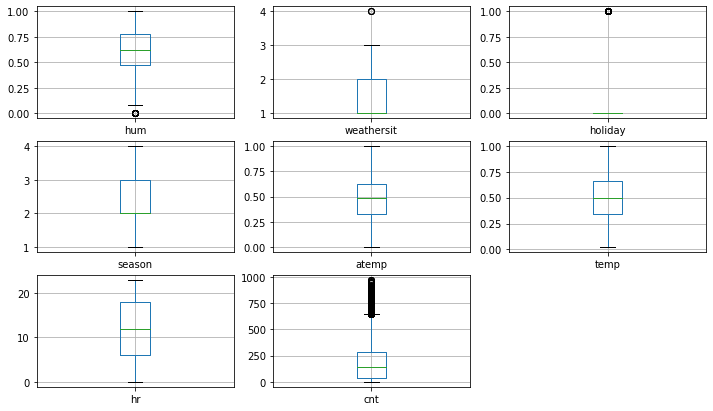

In [11]:
bp = df.drop('dteday', axis=1).columns.tolist()
n = 1

plt.figure(figsize=(12,7))
for i in bp:
    plt.subplot(3,3,n)
    df.boxplot(i)
    n += 1

Terlihat bahwa terdapat outlier yang cukup banyak pada fitur `cnt`, namun kita tidak memiliki bukti kuat untuk dapat menghapusnya dengan asumsi data tersebut bukan merupakan suatu kesalahan. penanganan yang akan dilakukan adalah menggunakan pendekatan [Chebyshev’s & Empirical rules](https://www.csus.edu/indiv/s/seria/lecturenotes/chebyshev.htm) menggunakan standar deviasi 3 dari mean, dengan begitu kita akan menyaring dan menggunakan 99.7% data yang tidak menyimpang atau menghilangkan 0.3% data yang menyimpang.

In [12]:
before = df.shape
df = df[np.abs(df['cnt']-df['cnt'].mean())<=(3*df['cnt'].std())]
after = df.shape
print('Before', before)
print('After', after)

Before (12165, 9)
After (11998, 9)


**Handling Skewness with Log Transformation**

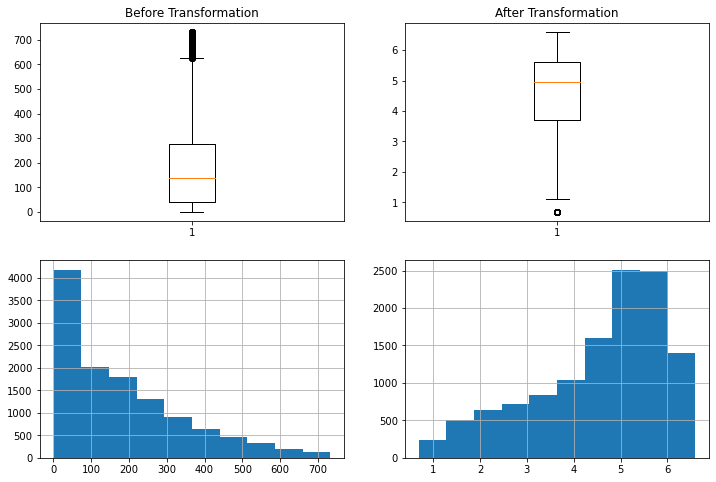

In [13]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.boxplot(df['cnt'])
plt.title('Before Transformation')

plt.subplot(2, 2, 2)
plt.boxplot(df['cnt'].apply(lambda x: np.log1p(x)))
plt.title('After Transformation')

plt.subplot(2, 2, 3)
df['cnt'].hist()

plt.subplot(2, 2, 4)
df['cnt'].apply(lambda x: np.log1p(x)).hist()

plt.show()


Kita akan melakukan penanganan data yang terindikasi sangat miring dan banyak outliers ini menggunakan transformasi logaritma, berdasarkan penelitian dari [sciencedirect.com](https://www.sciencedirect.com/topics/computer-science/log-transformation) metode ini berguna untuk mengompresi sumbu y. Misalnya, jika kita memiliki rentang data yang sangat besar, maka nilai yang lebih kecil dapat kewalahan oleh nilai yang lebih besar. Transformasi log juga kebal outlier dan memungkinkan kita untuk berpotensi mendapatkan distribusi yang ideal.

Transformasi Log digunakan karena nilai pada fitur `cnt` tidak dihasilkan karena kesalahan, jadi kita dapat menganggapnya sebagai outlier alami, berdasarkan asumsi tersebut kita tidak dapat menghapus data outlier ini, maka untuk menangani outlier tersebut kita menggunakan transformasi logaritma.

In [14]:
original_skew = df['cnt'].skew()
df['cnt'] = df['cnt'].apply(lambda x: np.log1p(x))

print('Before Transformation:', original_skew)
print('After Transformation:', df['cnt'].skew())

Before Transformation: 1.04506593926659
After Transformation: -0.8248840101070347


Dikutip dari situs [Oracle](https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html), Nilai kemiringan lebih besar dari 1 atau kurang dari -1 menunjukkan distribusi yang sangat miring. Nilai antara 0,5 dan 1 atau -0,5 dan -1 kemiringan moderat. Nilai antara -0,5 dan 0,5 menunjukkan bahwa distribusinya cukup simetris. 

Maka bisa disimpulkan berdasarkan hasil nilai kemiringan diatas memiliki -0.83 yang berarti memiliki kemiringan moderat, lebih baik dari sebelum transformasi di angka 1.0377 yang bisa di katakan sangat miring.

**Categorical Features**

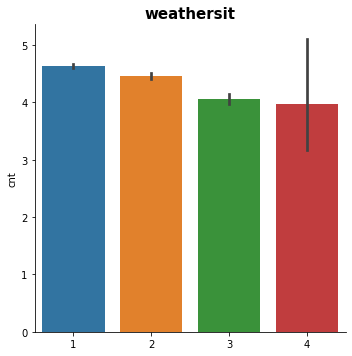

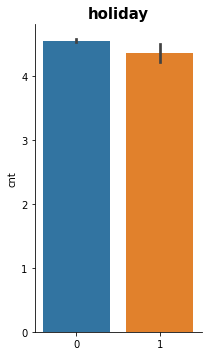

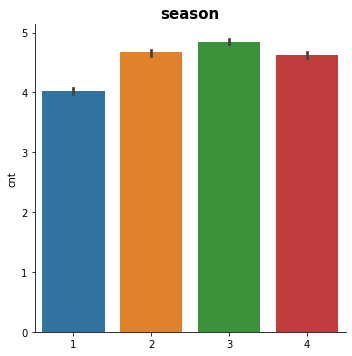

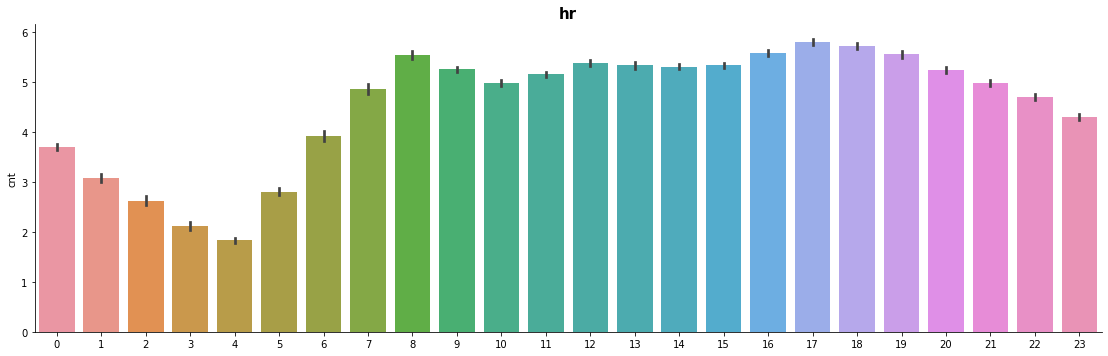

In [15]:
time_attr = ['weathersit', 'holiday', 'season', 'hr']

for i in time_attr:
    l = len(df[i].unique())
    if l == 2:
        aspect = .6
    elif l == 4:
        aspect = 1
    elif l == 7:
        aspect = 1.6
    elif l == 12:
        aspect = 2.1  
    elif l == 24:
        aspect = 3.1
    elif l == 31:
        aspect = 4.1
        
    sns.catplot(x=i, y='cnt', data=df,
                kind='bar', height=5, aspect=aspect)
    plt.title(i, size=15, weight='bold')
    plt.xlabel(None)
    plt.show()


**Numerical Features**

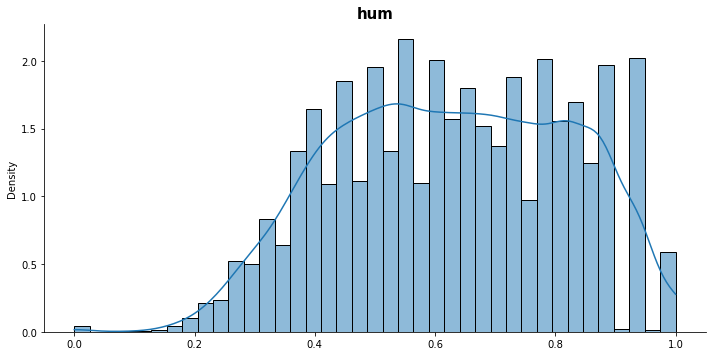

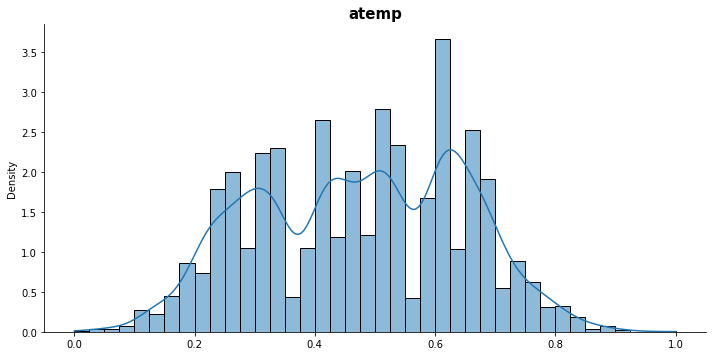

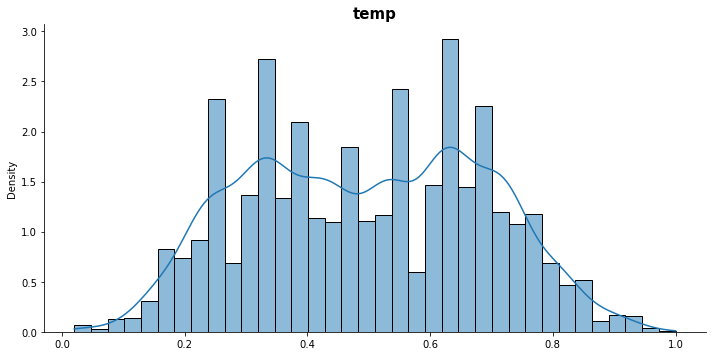

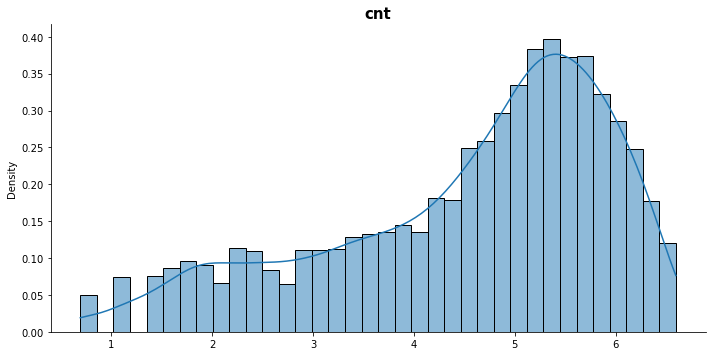

In [16]:
num_attr = ['hum', 'atemp', 'temp', 'cnt']

for i in num_attr:
    sns.displot(df[i], kde=True, stat='density', aspect=2)
    plt.title(i, size=15, weight='bold')
    plt.xlabel(None)
    plt.show()


### **Modeling**
---

**Custom Transformer to Extracting `dteday` Feature**

Untuk memperkaya data dan mempermudah dalam melakukan interpretasi maka fitur `dteday` akan kita ekstrak menjadi bagiannya sendiri, fitur baru hasil ekstraksi beserta keterangannya bisa dilihat tabel dibawah.

|Atribute|Data Type|Description|
|---|---|---|
|year|Integer|Year (2011 to 2012)|
|month|Integer|Month (1 to 12)|
|day|Integer|Day (1 to 31)|
|weekday|Integer|Day of the week (0: Sunday, 1: Monday, 2: Tuesday, 3: Wednesday, 4: Thursday, 5: Friday, 6: Saturday)|
|workingday|Integer|If the day is neither weekend (saturday & sunday on weekday column) nor holiday is 1, otherwise is 0|

In [17]:
class DateTransformer(BaseEstimator, TransformerMixin):  
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['year'] = X['dteday'].dt.year
        X['month'] = X['dteday'].dt.month
        X['day'] = X['dteday'].dt.day
        X['weekday'] = X['dteday'].dt.day_of_week
        X['workingday'] = np.where((X['holiday'] == 1) | (
            X['weekday'] == 5) | (X['weekday'] == 6), 0, 1)
        X = X.drop('dteday', axis=1)
        X = X.astype(str)
        return X

**Data Spliting**

Pada tahap ini kita melakukan pembagian data, disini kita tentukan fitur target yaitu adalah `cnt` dan sisanya akan masuk pada pemodelan untuk menemukan pola, selanjutnya akan ada pemisahan antara data untuk di latih dan data untuk melakukan tes/validasi

In [18]:
X = df.drop(['cnt'], axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
    random_state=42)


**Encoding** 

kita perlu melakukan encoding pada fitur kategorik karena komputer tidak dapat memproses data berbentuk kategorik, walaupun nilainya sudah berupa angka namun itu adalah nilai kategorik, jika di proses dengan data seperti itu maka akan membuat model salah dalam melakukan prediksi.

**One-Hot:** season, year, weekday, weathersit, holiday  
**Binary:** month, day, hr

In [19]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'),
     ['season', 'year', 'weekday', 'weathersit', 'holiday']),
    ('Binary', ce.BinaryEncoder(), ['month', 'day', 'hr'])
], remainder='passthrough')


**Simple Model Benchmarking**

Pada tahap ini kita akan melakukan proses pencarian skor dari metrik yang telah kita tentukan sebelumnya, algoritma yang digunakan antara lain `LinearRegression`, `Decision Tree`, `Random Forest`, `XGBoost`, dan `LightGBM`. kita juga menggunakan `Standard Scaler` karena merupakan yang paling tepat untuk kasus regresi dengan tidak terlalu banyak outlier. 

In [20]:
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
lgb = LGBMRegressor(random_state=42)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_lgb = TransformedTargetRegressor(lgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_dt, log_rf, log_xgb, log_lgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_msle = []
nilai_mean_msle = []
nilai_std_msle = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('dates', DateTransformer()),
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])
    
    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())
    
    # RMSLE - Root Mean Squared Log Error.
    # This metric is used when the Target variable is converted into Log(Target).
    # This metric reduces errors generated by outliers in dataset
    model_cv_msle = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_squared_log_error',
        error_score='raise'
    )

    print(model_cv_msle, i)

    score_msle.append(model_cv_msle)
    nilai_mean_msle.append(model_cv_msle.mean())
    nilai_std_msle.append(model_cv_msle.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
    )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
    )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())


[-1.1524926  -1.2056115  -1.21512698 -1.20249011 -1.15304591] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.06566896 -0.06608374 -0.06986103 -0.06712477 -0.06411202] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.95046397 -0.97248758 -1.00624919 -0.9603761  -0.94434092] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.30188527 -0.28868215 -0.31110902 -0.28943809 -0.29301515] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.79074958 -0.96293934 -0.80373512 -0.83004952 -0.56101809] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=42))
[-0.032626

[-0.11375985 -0.10579548 -0.11041103 -0.10247363 -0.09399373] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  enable_categorical=False,
                                                  gamma=None, gpu_id=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  mi

In [21]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'LightGBM Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MSLE': nilai_mean_msle,
    'Std_MSLE': nilai_std_msle,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MSLE,Std_MSLE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regressor,-1.185753,0.027252,-0.066570,0.001909,-0.966784,0.021914,-0.296826,0.008544
1,DecisionTree Regressor,-0.789698,0.129718,-0.033618,0.008944,-0.497971,0.071684,-0.152624,0.022207
2,RandomForest Regressor,-0.546620,0.082682,-0.015663,0.004042,-0.392693,0.055402,-0.117110,0.015669
3,XGBoost Regressor,-0.483981,0.032200,-0.012172,0.001384,-0.360345,0.024586,-0.105287,0.006837
4,LightGBM Regressor,-0.461230,0.036149,-0.011226,0.001375,-0.345947,0.025985,-0.101948,0.006297


berdasarkan data diatas, menunjukan terdapat 3 model terbaik berdasarkan neg-MSLE dan metrik lain diatas yaitu `Random Forest`, `XGBoost`, `LightGBM`. sedangkan 2 sisanya terpaut jauh dari ketiga model yang telah disebutkan. selanjutnya, ketiga model terbaik ini akan kita uji lagi dengan melakukan prediksi pada test set.

*perlu diperhatikan disini kita masih menggunakan MSLE dan bukan RMSLE dikarenakan tidak tersedianya metrik tersebut pada fungsi sklearn saat penelitian ini dibuat, sedangkan jika ingin di lakukan secara manual menggunakan fungsi square root akan menghasilkan nilai nan karena tidak dapat melakukan perhitungan nilai negatif.

In [22]:
from sklearn import metrics

metrics.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

**Simple Modeling and Predicting with RandomForest, XGBoost, LightGBM**

In [23]:
models = {
    'Random Forest': lr,
    'XGB': xgb,
    'LightGBM': lgb
}

score_rmse = []
score_rmsle = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('dates', DateTransformer()),
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score_rmse.append(np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))
    score_rmsle.append(np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))))
    score_mae.append(mean_absolute_error(np.expm1(y_test), np.expm1(y_pred)))
    score_mape.append(mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_pred)))

score_before_tuning = pd.DataFrame(
    {'RMSE': score_rmse, 'RMSLE': score_rmsle, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,RMSLE,MAE,MAPE
Random Forest,159.989316,1.160036,109.834887,2.043436
XGB,79.931778,0.460243,47.352365,0.427581
LightGBM,86.048454,0.524619,52.473721,0.519813


ketika melakukan prediksi pada test set disini terlihat bahwa dari segi RMSLE, maupun skor lain, `XGBoost` merupakan yang terbaik, model 'LightGBM' juga termasuk baik disini, tetapi karena target kita transformasi menggunakan `Logarithm Transformation` maka kita akan menggunakan skor RMSLE sebagai acuan utamanya. namun sayangnya pada saat penelitian ini dibuat berdasarkan [Dokumentasi LightGBM](https://lightgbm.readthedocs.io/en/latest/Parameters.html#metric-parameters), algoritma `LightGBM` ini tidak mempunyai metrics tersebut. oleh karena itu kita hanya akan menggunakan algoritma terbaik  berdasarkan data diatas yaitu `XGBoost` untuk kita tunning pada langkah selanjutnya.

*Perlu diperhatikan, sebelumnya kita telah melakukan transformasi mengunakan logaritma pada kolom target yaitu `cnt` oleh karena itu, melakukan skoring menggunakan data tersebut merupakan hal yang kurang tepat, maka disini kita menggunakan fungsi np.expm1() yang merupakan inverse dari np.log1p() yang kita gunakan sebelumnya yang berarti dapat digunakan untuk mengembalikan nilai aslinya, dan hasilnya kita jadi dapat membandingkan skor pada nilai prediksi dan aktual dengan skala yang sebenarnya.

**Hyperparameter Tuning**

Karena pada model XGBoost kita mendapatkan performa terbaik dan dapat menggunaakan metrik RMSLE, maka selanjutnya kita kan menggunakan model ini hingga akhir penelitian. pada tahap ini, kita akan mencoba meningkatkan performa model dengan melakukan hyperparameter tuning. 

disini kita akan melakukan hyperparameter tuning menggunakan `RandomizedSearchCV` dikarenakan kinerjanya yang sangat ringan walaupun memiliki kekurangan yaitu proses tuning dilakukan secara acak dan tidak menyeluruh seperti yang dilakukan `GridSearchCV`

untuk panduan tuning untuk model XGBoost, dapat mengacu pada dokuemntasinya di [XGBoost Parameters](https://xgboost.readthedocs.io/en/stable/parameter.html)


In [24]:
# Kedalaman pohon
max_depth = list(np.arange(1, 16))

# Learning rate
# list(np.arange(0.01, 1.01, 0.01))
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
# Semakin besar nilainya, semakin konservatif/simpel modelnya
gamma = list(np.arange(1, 11))

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
# Semakin besar nilainya, semakin konservatif/simpel modelnya
reg_alpha = list(np.logspace(-3, 1, 10))  # [0.01, 0.1, 1, 10, 100]


# Hyperparam space XGboost
hyperparam_space = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}


In [25]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=42, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
    ('dates', DateTransformer()),
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', xgb)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator_xgb,
    param_distributions=hyperparam_space,
    n_iter=50,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_squared_log_error', 
             'neg_mean_absolute_error','neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    # Hanya bisa memilih salah stau metric untuk optimisasi
    refit='neg_mean_squared_log_error',
    random_state=42,
    verbose=1
)


In [26]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('dates', DateTransformer()),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['season',
                                                                                'year',
                                                                                'weekday',
                                  

In [27]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSLE, MAE & MAPE
pd.DataFrame(random_search.cv_results_).sort_values(by=['rank_test_neg_mean_squared_log_error',
                                                     'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
28,10.554282,0.084779,0.040622,0.007649,0.8,0.002783,186,11,0.32,4,...,0.014470,1,-0.102189,-0.103345,-0.105384,-0.105460,-0.093540,-0.101983,0.004401,1
10,3.684343,0.137426,0.049996,0.015311,0.9,0.059948,109,8,0.48,5,...,0.020955,2,-0.107854,-0.112635,-0.109338,-0.109269,-0.097667,-0.107352,0.005091,2
14,18.787310,0.331218,0.040620,0.007652,0.9,0.007743,164,15,0.46,10,...,0.014225,3,-0.113344,-0.114989,-0.114983,-0.110072,-0.106875,-0.112053,0.003150,3
0,3.516737,0.097025,0.040620,0.007655,0.8,0.002783,175,6,0.66,6,...,0.022028,4,-0.131784,-0.128729,-0.128029,-0.113759,-0.121700,-0.124800,0.006421,4
9,10.885545,0.472753,0.040626,0.007654,0.9,0.464159,162,12,0.14,2,...,0.034202,5,-0.136075,-0.141503,-0.127559,-0.163477,-0.143340,-0.142391,0.011885,5


In [28]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_search.best_score_)
print('Best_params:', random_search.best_params_)

XGBoost
Best_score: -0.01157409004906427
Best_params: {'model__subsample': 0.8, 'model__reg_alpha': 0.0027825594022071257, 'model__n_estimators': 186, 'model__max_depth': 11, 'model__learning_rate': 0.32, 'model__gamma': 4, 'model__colsample_bytree': 0.9}


**Tunned Modeling and Predicting with XGBoost**

Tahap ini melakukan proses fitting ulang menggunaakn parameter terbaik yang didapat dari tahap tuning sebelumnya, lalu melakukan prediksi pada test set.

In [29]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=42)}

# Define model terhadap estimator terbaik
xgb_tuning = random_search.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, RMSLE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_xgb_tuning)))
rmsle_xgb_tuning = np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_xgb_tuning)))
mae_xgb_tuning = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_xgb_tuning))
mape_xgb_tuning = mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_pred_xgb_tuning))

**Performance Comparison**

In [30]:
final_score = {'XGB Before Tuning': {'RMSE': score_before_tuning.loc['XGB']['RMSE'],
                              'RMSLE': score_before_tuning.loc['XGB']['RMSLE'],
                              'MAE': score_before_tuning.loc['XGB']['MAE'],
                              'MAPE': score_before_tuning.loc['XGB']['MAPE']},
               'XGB After Tuning': {'RMSE': rmse_xgb_tuning, 'RMSLE': rmsle_xgb_tuning, 
                                    'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning},}
pd.DataFrame(final_score).T

,RMSE,RMSLE,MAE,MAPE
XGB Before Tuning,79.931778,0.460243,47.352365,0.427581
XGB After Tuning,77.962755,0.471320,47.121819,0.437451


Terlihat bahwa skor RMSE dan MAE mengalami sedikit kenaikan namun untuk RMSLE dan MAPE malah mengalami sangat sedikit penurunan setelah melakukan hyperparameter tuning

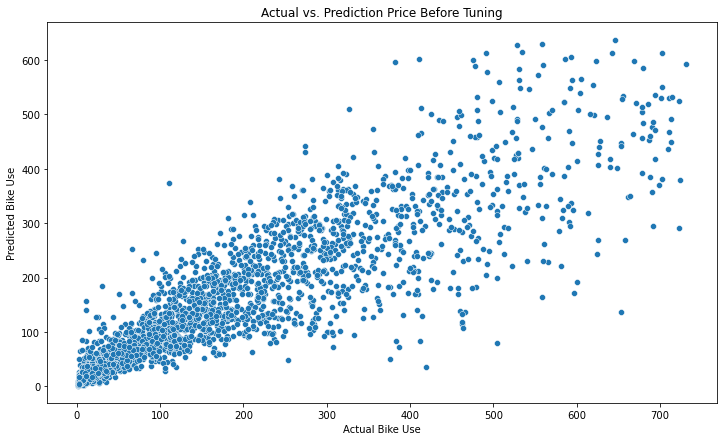

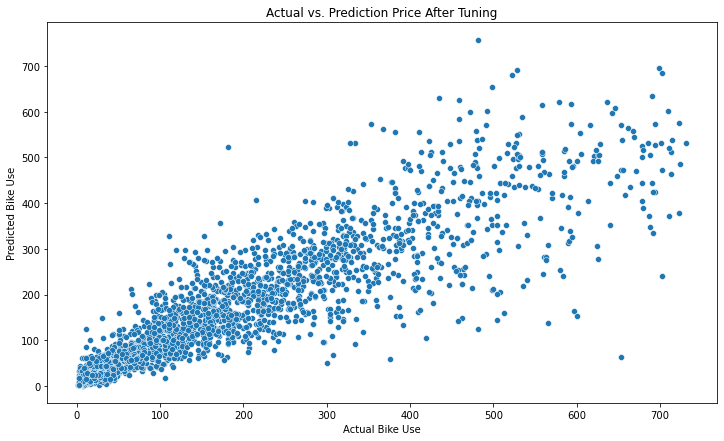

In [31]:
plt.figure(figsize=(12, 7))
plot = sns.scatterplot(x=np.expm1(y_test), y=np.expm1(y_pred)).set(title='Actual vs. Prediction Price Before Tuning',
                                                                   xlabel='Actual Bike Use',
                                                                   ylabel='Predicted Bike Use')
plt.show()

plt.figure(figsize=(12, 7))
plot = sns.scatterplot(x=np.expm1(y_test), y=np.expm1(y_pred_xgb_tuning)).set(title='Actual vs. Prediction Price After Tuning',
                                                          xlabel='Actual Bike Use',
                                                          ylabel='Predicted Bike Use')
plt.show()



berdasarkan kedua grafik diatas, terlihat bahwa semakin besar nilainya maka semakin besar juga kemungkinan terjadi error, dimana ini merupakan suatu limitasi dari dataset yang kita gunakan yang hanya berjumlah sekitar 12 ribu saja. data kebanyakan tersebar di sejumlah kecil sepeda yang digunakan, hanya sedikit kondisi dimana sepeda sangat banyak digunakan, hal ini membuat model gagal memprediksi dengan baik kondisi tersebut dimana sepeda banyak digunakan.

**Feature Importances**

Untuk dapat mengetahui fitur apa saja yang paling memengaruhi target, kita dapat mengeceknya menggunakan function feature_importances_.

In [32]:
estimator_xgb = Pipeline([('dates', DateTransformer()),
                        ('preprocessing', transformer),
                        ('scaler', scaler),
                        ('model', xgb)
                    ])

estimator_xgb.fit(X_train, y_train);

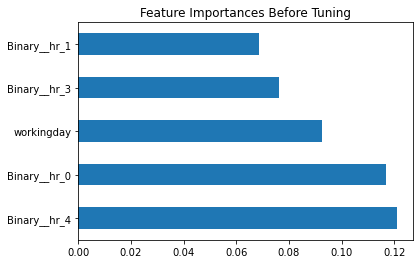

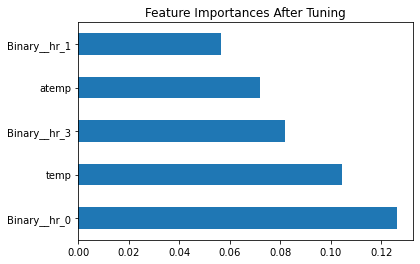

In [33]:

feature_imp_before = pd.Series(estimator_xgb['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp_after = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()


feature_imp_before.plot(kind='barh', title='Feature Importances Before Tuning');
plt.show()
feature_imp_after.plot(kind='barh', title='Feature Importances After Tuning');
plt.show()

**Predicted Vs Actual Value**

pada tahap ini kita ingin membandingkan nilai aktual dengan hasil prediksi menggunakan model sebelum dituning dan setelah dituning 

In [34]:
# Because of model programmed with log, then we neet to change back the prediction to real value with np.expm1()
pred_tuned = np.expm1(y_pred_xgb_tuning)
pred = np.expm1(y_pred)
actual = np.expm1(y_test) 

validation = pd.DataFrame({'prediction': pred, 'tunned prediction': pred_tuned, 'actual': actual})
validation


,prediction,tunned prediction,actual
1958,459.079002,537.781189,481.0
10536,297.803294,383.620331,404.0
7010,202.372078,180.067459,180.0
4133,2.263715,2.085660,3.0
364,24.349680,17.618425,11.0
...,...,...,...
6385,133.145289,116.269012,92.0
5492,17.275450,23.406687,18.0
3910,163.898831,115.481438,243.0
8730,74.891492,71.289940,37.0


### **Conclusion**
---

Berdasarkan pemodelan yang telah kita lakukan dapat disimpulkan bahwa model yang kita gunakan memiliki kecenderungan semakin tinggi nilainya maka akan semakin menyebar, hal ini memungkinkan karena terdapat limitasi pada dataset yang memiliki kecenderungan serupa.

Dari segi fitur yang paling berpengaruh untuk model sebelum tuning masing-masing adalah `hr`, dan `workingday`, sedangkan pada model setelah tuning memiliki fitur yang paling berpengaruh yang berbeda yaitu `hr`, `temp`, dan `atemp`.

Berdasarkan metrik yang digunakan pada penelitian ini yaitu RMSE, RMSLE, MAE, dan MAPE. jika dilihat dari hasilnya, nilai RMSE setelah tuning memiliki skor yang lebih baik hal ini membuat prediksi yang di dapat semakin akurat berdasarkan rataannya, tetapi jika disandingkan dengan RMSLE nilai yang dihasilkan sebelum melakukan hyperparameter tuning mempunyai RMSE sebesar 79.9, dengan RMSLE sebesar 0.460, sedangkan untuk nilai setelah melakukan hyperparameter tunning mempunyai RMSE sebesar 77.96, dengan RMSLE sebesar 0.47. eror yang dihasilkan RMSLE pada model sebelum tuning justru lebih kecil dengan RMSE nya yang justru lebih besar, hal ini terjadi karena RMSLE merupakan suatu rasio dimana ketika persebaran yang ada lebih besar maka metrik malah akan membuat erornya lebih kecil, hal ini berguna jika kita ingin menyamaratakan prediksi yang menghasilkan nilai terlalu tinggi atau terlalu rendah. metrik RMSLE cukup tepat digunakan pada kasus persediaan yang biasanya memang terjadi perbedaan pada tiap kondisi dan lokasi.

untuk MAE dan MAPE sendiri mirip seperti RMSE dan RMSLE, untuk perbedaannya MAE mengambil nilai absolutnya, sedangkan RMSE mengambil nilai kudaratiknya. untuk MAPE sendiri dihasilkan dari presentase nilai eror yang dihasilkan dari MAE.

### **Recommendation**
---

Untuk mengembangkan model agar dapat menjadi lebih baik lagi dapat dilakukan hal-hal berikut ini:
1. Mengecek performa pada model lain yang tidak kita gunakan saat ini seperti Ridge, Lasso, ataupun yang lebih kompleks seperti Neural Network, dll. hal ini dapat meningkatkan kemungkinan adanya model yang berpotensi menjadi lebih baik lagi. terutama pada model LightGBM yang tidak jadi dipakai karena masalah kompatibilitas, bisa dibuatkan fungsi untuk pengecekan performa model agar dapat mengeluarkan metrik dari RMSLE yang telah kita jadikan acuan utama pada penelitian ini.

1. Lakukan penambahan fitur yang mungkin akan mempunyai korelasi tinggi terhadap target, misalkan seperti lokasi, kecepatan angin, perkiraan cuaca beberapa waktu kedepan, lama sepeda digunakan, dll. jika memungkinkan, lakukan penambahan data secara signifikan dengan mungkin memasukan data dari wilayan lain yang tidak tercakup pada data yang kita gunakan, hal ini perlu dilakukan untuk menambah keakuratan model yang dihasilkan.

1. Optimalkan parameter yang digunakan pada hyperparameter tuning, seperti yang telah diteliti sebelumnya bahwa hyperparameter tuning yang kita lakukan malah membuat performa model menurun, hal ini terjadi karena adanya limitasi pada pengetahuan yang dimiliki sehingga parameter yang digunakan hanya berdasarkan 'trial and error', diharapkan kedepannya dapat meningkatkan pengetahuannya pada hal tersebut.

1. Dataset yang digunakan memungkinkan kita untuk melakukan 'anomaly detection', yaitu melakukan pendeteksian jika terjadi hal diluar kebiasaan, misal seperti jam 1 malam yang seharusnya hanya sedikit atau mungkin tidak ada sama sekali yang menyewa sepeda namun yang terjadi saat itu adalah sebaliknya, sepeda yang disewa pada saat itu malah sangat tinggi yang mungkin disebabkan oleh faktor eksternal seperti misalnya adanya konser ataupun acara besar lainnya didekat lokasi penyewaan sepeda pada waktu tersebut, hal ini membuat sistem mendeteksi adanya kebiasaan yang tidak wajar, fungsinya sendiri karena penyewaan sepeda ini dilakukan secara online dan terintegrasi maka penyedia penyewaan sepeda dapat secara cepat melakukan distribusi pada area tersebut jika memungkinkan.

### **Save, Load, Predict Model with Pickle**
---

**Save Model**

Untuk model akhir yang digunakan adalah model hasil setelah tuning karena memiliki RMSE yang lebih kecil walaupun dengan RMSLE yang lebih besar, hal ini dikarenakan asumsi sebelumnya yang menyatakan RSMLE baik digunakan untuk menyamaratakan hasil prediksi yang nilainya jauh berbeda dan tepat digunakan pada model yang mempunyai banyak perbedaan karena suatu alasan misal perbedaan kebiasaan di negara berbeda dan lainnya, sedangkan data yang kita gunakan hanya bertempat di satu lokasi dengan hanya melihat kondisi dan waktunya saja.

In [35]:
filename = 'Model_BikeSharing_XGB.sav'

# Jika menggunakan model sebelum tuning
# estimator = Pipeline([('dates', DateTransformer()),
#                       ('preprocessing', transformer),
#                       ('scaler', scaler),
#                       ('model', xgb)])
# estimator.fit(X_train, y_train)
# pickle.dump(estimator, open(filename, 'wb'))

# Jika Menggunakan Model Setelah di Tuning
pickle.dump(xgb_tuning, open(filename, 'wb'))

**Load Model**

In [ ]:
# Don't forget to run libraries section
loaded_model = pickle.load(open(filename, 'rb'))

**Predict New Data**

In [ ]:
# Read New Dataset
# test = pd.read_csv()

In [ ]:
# USE THIS ONLY IF WANT TO MEASURE ERROR WITH LOGARITHM TRANSFORMATION ON CNT FEATURE
# NOT RECOMMENDED, BECAUSE IT WILL MEASURE WITHOUT THE ACTUAL VALUE
# test['cnt'] = test['cnt'].apply(lambda x: np.log1p(x)) 

X_new = test.drop(['cnt'], axis=1)
y_new = test['cnt']

In [ ]:
y_pred_test = loaded_model.predict(X_new)

def new_model(scoring):
    return scoring(y_new, np.expm1(y_pred_test)) # IF NOT USE LOGARITHN TRANSFORMATION
    # return scoring(y_new, y_pred_test) # IF USE LOGARITHM TRANSFORMATION


In [ ]:
print('RMSLE:', np.sqrt(new_model(mean_squared_log_error)))
print('MAE:', new_model(mean_absolute_error))
print('MAPE:', new_model(mean_absolute_percentage_error))

In [ ]:
# Because of model programmed with log, then we neet to change back the prediction to real value with np.expm1()
pred_test = np.expm1(y_pred_test) 
actual_test = y_new  # IF NOT USE LOGARITHM TRANSFORMATION
# actual_test = np.expm1(y_new)  # IF USE LOGARITHM TRANSFORMATION

prediction = pd.DataFrame({'prediction': pred_test, 'actual': actual_test})

prediction['prediction'] = prediction.apply(lambda x: 1 if (x['prediction'] <= 0) else x['prediction'], axis=1)
# prediction.to_csv("prediction.csv", index=False)

prediction
